# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Load dataset from previous task
df = pd.read_csv('./[Klasifikasi]_Ship_Performance_Dataset.csv')
df.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,cluster
0,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,2
1,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,0
2,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,3
3,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,2
4,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),Fair,18.616196,2171.646567,723.304215,14.916320,Rough,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,1


In [3]:
# Separate the dataset into based on the numerical and categorical features
object_df = df.select_dtypes(include='object').columns.tolist()
numeric_df = df.select_dtypes(exclude='object').columns.tolist()[:-1]

In [4]:
# Encode the categorical features
df_encoded = df.copy()
for col in object_df:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    
df_encoded.head()

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,cluster
0,2,2,2,2,10.387580,1796.057415,1060.486382,14.653083,2,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,2
1,1,1,0,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,0
2,0,3,2,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,3
3,2,3,0,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,2
4,2,1,1,1,18.616196,2171.646567,723.304215,14.916320,2,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Separate the dataset into features and target
X = df_encoded.drop('cluster', axis=1)
y = df_encoded['cluster']

# Split the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Scaling the numerical features without involving the encoded categorical features
scaler = MinMaxScaler()
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_df])
X_test_scaled_numeric = scaler.transform(X_test[numeric_df])

X_train_scaled_numeric_df = pd.DataFrame(X_train_scaled_numeric, columns=numeric_df)
X_test_scaled_numeric_df = pd.DataFrame(X_test_scaled_numeric, columns=numeric_df)

for i in X_train_scaled_numeric_df.columns:
    X_train_clean[i] = X_train_scaled_numeric_df[i].values
    X_test_clean[i] = X_test_scaled_numeric_df[i].values


In [7]:
# Check all train data is clean
X_train_clean.isna().sum().sum(), X_test_clean.isna().sum().sum()

(np.int64(0), np.int64(0))

In [8]:
# Simple check the distribution of the target in the training and testing set
y_train.value_counts(), y_test.value_counts()

(cluster
 0    449
 1    432
 3    411
 2    409
 Name: count, dtype: int64,
 cluster
 0    112
 1    108
 3    103
 2    103
 Name: count, dtype: int64)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### Decision Tree Model

In [9]:
#Type your code here
dt = DecisionTreeClassifier()
dt.fit(X_train_clean, y_train)

DecisionTreeClassifier()

### K-Nearest Neighbours

In [10]:
knn = KNeighborsClassifier()
knn.fit(X_train_clean, y_train)

KNeighborsClassifier()

### Naive Bayes

In [11]:
nb = GaussianNB()
nb.fit(X_train_clean, y_train)

GaussianNB()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [12]:
def check_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%")
    print(f"{model.__class__.__name__} Macro Precision Score: {precision_score(y_test, y_pred, average='macro')}")
    print(f"{model.__class__.__name__} Macro Recall Score: {recall_score(y_test, y_pred, average='macro')}")
    print(f"{model.__class__.__name__} Macro F1 Score: {f1_score(y_test, y_pred, average='macro')}")
    print(f"{model.__class__.__name__} Confusion Matrix:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.show()

DecisionTreeClassifier Accuracy Score: 100.00%
DecisionTreeClassifier Macro Precision Score: 1.0
DecisionTreeClassifier Macro Recall Score: 1.0
DecisionTreeClassifier Macro F1 Score: 1.0
DecisionTreeClassifier Confusion Matrix:


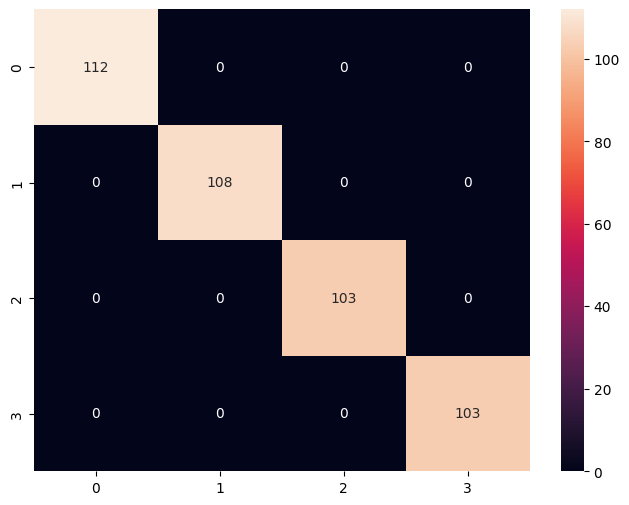

In [13]:
# Decision Tree model evaluation
check_metrics(dt, X_test_clean, y_test)

KNeighborsClassifier Accuracy Score: 99.30%
KNeighborsClassifier Macro Precision Score: 0.9928520530863097
KNeighborsClassifier Macro Recall Score: 0.9929134882108183
KNeighborsClassifier Macro F1 Score: 0.9928724811020584
KNeighborsClassifier Confusion Matrix:


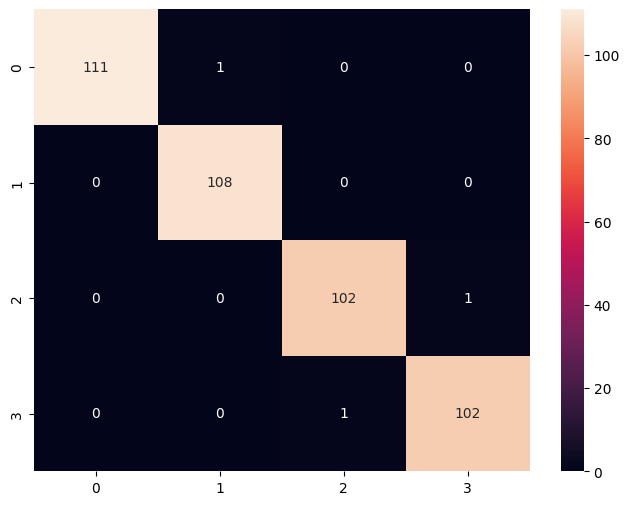

In [14]:
# KNN model evaluation
check_metrics(knn, X_test_clean, y_test)

GaussianNB Accuracy Score: 100.00%
GaussianNB Macro Precision Score: 1.0
GaussianNB Macro Recall Score: 1.0
GaussianNB Macro F1 Score: 1.0
GaussianNB Confusion Matrix:


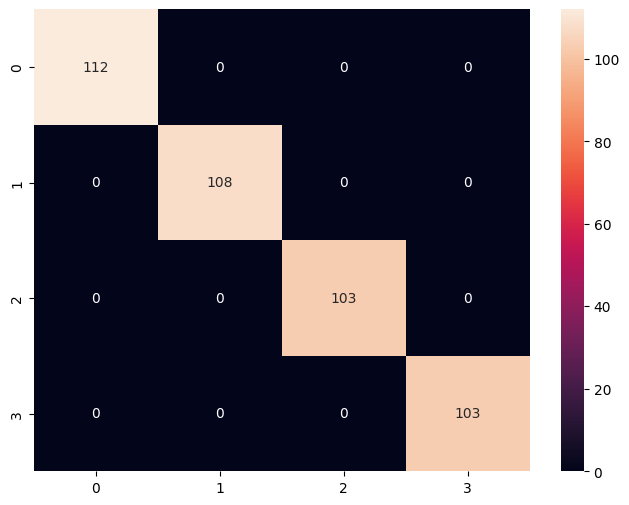

In [15]:
# Naive Bayes model evaluation
check_metrics(nb, X_test_clean, y_test)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here
# No need tuning, because the dataset is already clean and the model result are already satisfying

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [17]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### Model Result Analysis